# How To Implement Simple Linear Regression From Scratch With Python

by Jason Brownlee on May 11, 2020.[Here](https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/) in [Code Algorithms From Scratch](https://machinelearningmastery.com/category/algorithms-from-scratch/)

In this tutorial, you will discover how to implement the simple linear regression algorithm from scratch in Python.

After completing this tutorial you will know:

- How to estimate `statistical quantities` from training data.
- How to estimate `linear regression coefficients` from data.
- How to `make predictions` using linear regression for new data.

## Tutorial
This tutorial is broken down into five parts:

1. Calculate Mean and Variance.
2. Calculate Covariance.
3. Estimate Coefficients.
4. Make Predictions.
5. Predict Insurance.

## Introduction

### Simple Linear Regression
Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y).

More specifically, that output (y) can be calculated from a linear combination of the input variables (X). `When there is a single input variable, the method is referred to as a simple linear regression`.

The line for a simple linear regression model can be written as: $y = b0 + b1 * x$. Where b0 and b1 are the coefficients we must estimate from the training data.

Briefly, we can estimate the coefficients as follows:

$B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )$

$B0 = mean(y) - B1 * mean(x)$

where the i refers to the value of the ith value of the input x or output y.


### Swedish Insurance Dataset

The dataset is called the “`Auto Insurance in Sweden`” dataset and involves predicting the total payment for all the claims in thousands of Swedish Kronor (y) given the total number of claims (x).

Dataset from [here](https://www.math.muni.cz/~kolacek/docs/frvs/M7222/data/AutoInsurSweden.txt) or [here](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html).

## 1. Calculate Mean and Variance.

In [1]:
# Estimate Mean and Variance

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate the variance of a list of numbers
# variance is the sum squared difference for each value from the mean value
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# calculate mean and variance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

x = [row[0] for row in dataset]
y = [row[1] for row in dataset]

mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)

print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800


   0
1  1
2  3
3  2
4  3
5  5


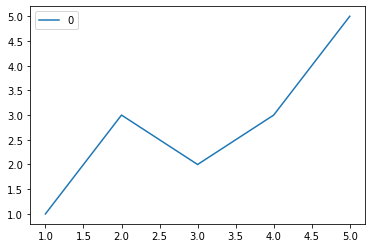

In [10]:
import pandas as pd
df = pd.DataFrame([1,3,2,3,5], index=[1,2,3,4,5])
print(df)
df.plot()

## 2. Calculate Covariance.
The covariance of two groups of numbers describes how those numbers change together.

__Covariance is a generalization of correlation__. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers.

Additionally, covariance can be normalized to produce a correlation value.

In [11]:
# Calculate Covariance

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# calculate covariance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

x = [row[0] for row in dataset]
y = [row[1] for row in dataset]

mean_x, mean_y = mean(x), mean(y)
covar = covariance(x, mean_x, y, mean_y)

print('Covariance: %.3f' % (covar))

Covariance: 8.000


## 3. Estimate Coefficients.

We must estimate the values for two coefficients in simple linear regression.

The first is B1 which can be estimated as:

$B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )$

We have learned some things above and can simplify this arithmetic to:

$B1 = covariance(x, y) / variance(x)$

We already have functions to calculate __covariance()__ and __variance()__.

Next, we need to estimate a value for $B0$, also called the __intercept__ as it `controls the starting point of the line where it intersects the y-axis`.

$B0 = mean(y) - B1 * mean(x)$

Again, we know how to estimate B1 and we have a function to estimate __mean()__.

In [12]:
# Calculate Coefficients

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

# calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
b0, b1 = coefficients(dataset)

print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=0.400, B1=0.800


## 4. Make Predictions.
The simple linear regression model is a line defined by __coefficients estimated__ from training data.

Once the coefficients are estimated, we can use them to make predictions.

The __equation to make predictions__ with a simple linear regression model is as follows:

$y = b0 + b1 * x$

In [14]:
# Standalone simple linear regression example
from math import sqrt

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print('Predicted:', predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)

print('RMSE: %.3f' % (rmse))

Predicted: [1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


## 5. Predict Insurance.

In [22]:
from pandas import read_csv
# Simple linear regression on insurance dataset
seed(1)
# load and prepare data
filename = '..\\..\\..\\data\\autoInsursweden.data.csv'
dataset = read_csv(filename)
dataset

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [4]:
# Simple Linear Regression on the Swedish Insurance Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Split a dataset into a train and test set
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
    train, test = train_test_split(dataset, split)
    test_set = list()
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(train, test_set, *args)
    actual = [row[-1] for row in test]
    rmse = rmse_metric(actual, predicted)
    return rmse

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

# Simple linear regression on insurance dataset
seed(1)

# load and prepare data
#filename = 'insurance.csv'
filename = '..\\..\\..\\data\\autoInsursweden.data.csv'
dataset = load_csv(filename)

for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)

# evaluate algorithm
split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)

print('RMSE: %.3f' % (rmse))

RMSE: 33.630
